## **Probabilidad condicional**

Una de las nociones más fundamentales en probabilidad condicional es la del **teorema de Bayes** el cual habla de una probabilidad conjunta de sucesos que en principio son dependientes uno del otro. 

De manera general si $B_{1}, B_{2}, ..., B_{k}$ representa una partición de $\mathfrak{L}$ y $A$ es un evento arbitrario de $\mathfrak{L}$, la probabilidad total de $A$ está dada por

$P(A) = P(B_{1})\cdot P(A\mid B_{1})+P(B_{2})\cdot P(A\mid B_{2})+...+P(B_{k})\cdot P(A\mid B_{k}) = \sum_{i = 1}^{k}P(B_{i})\cdot P(A\mid B_{i})$

Siguiendo este razonamiento al ser $A$, un evento más general del conjunto $\mathfrak{L}$, es de gran interés poder calcular la probabilidad de los eventos dependientes bajo el supuesto de que sabemos que a ocurrido $A$, entonces para $r = 1, 2, ..., k,$

$P\left ( B_{r}\mid  A\right ) = \frac{P(B_{r})\cdot P(A\mid B_{r})}{\sum_{i = 1}^{k}P(B_{i})\cdot P(A\mid B_{i})}$

Donde $P\left ( B_{r}\mid  A\right )$ representa la probabilidad de que suceda el evento $B_{r}$, dado que se sabe que a sucedido $A$. Dicha expresión anterior puede ser escrita de manera más compacta como le sigue:

$P\left ( B_{r}\mid  A\right ) = \frac{P(B_{r}\cap A)}{P(A)}$

para $P(B_{r}\cap A)$ la intersección del evento $B_{r}$ en el evento $A$.


podemos expresar entonces el **teorema de Bayes** como se muestra a continuación:

$p\left ( \lambda (x_{i},\vec{\theta })\mid \vec{x} \right ) = \frac{p\left (\vec{x} \mid \lambda (x_{i},\vec{\theta }) \right )p\left ( \lambda (x_{i},\vec{\theta }) \right )}{p\left ( \vec{x} \right )}$

donde $\vec{x}$ son los datos con los que entrenaremos el modelo $\lambda (x_{i},\vec{\theta })$ con parámetros $\vec{\theta }$ identificando los siguientes términos:

*   $p\left (\vec{x} \mid \lambda (x_{i},\vec{\theta }) \right )$ es el likelihood 
*   $p\left ( \lambda (x_{i},\vec{\theta }) \right )$ se conoce como el prior
*   donde $p\left ( \lambda (x_{i},\vec{\theta })\mid \vec{x} \right )$ es el posterior.

El prior es una distribución propuesta, con parámetros bien o no tan bien conocidos de un experimento anterior. 





In [1]:
!pip install corner

In [2]:
import numpy as np
import likelihood as lp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', 'RuntimeWarning')

In [3]:
plt.rcParams['font.size'] = 24
plt.style.use('seaborn-poster')

Definimos a su vez el likelihood 

$\mathfrak{L} \propto \prod_{i}^{n}\frac{1}{\sqrt{2\pi}\sigma _{i}}\exp\left ( -\frac{\left ( x_{i}-\mu  \right )^{2}}{2\sigma _{i}^{2}} \right )$

Aplicando el logaritmo ambos lados

$-Ln(\mathfrak{L}(\vec{x},\vec{y}\mid \vec{\theta }))\propto \frac{1}{2}\sum_{i}^{n}\left ( \frac{y_{i}-\lambda (x_{i},\vec{\theta })}{\sigma_{i}} \right )^{2}$

### **Ejemplo 1**

* Se tienen los siguientes datos (gráfica 1), y nuestro objetivo es encontrar un modelo paramétrico que los ajuste
* Proponemos el siguiente modelo : $f(x_{1},x_{2} ; \theta_{1}, \theta_{2}) = \theta_{1} x_{1} + \theta_{2} x_{2}^2$

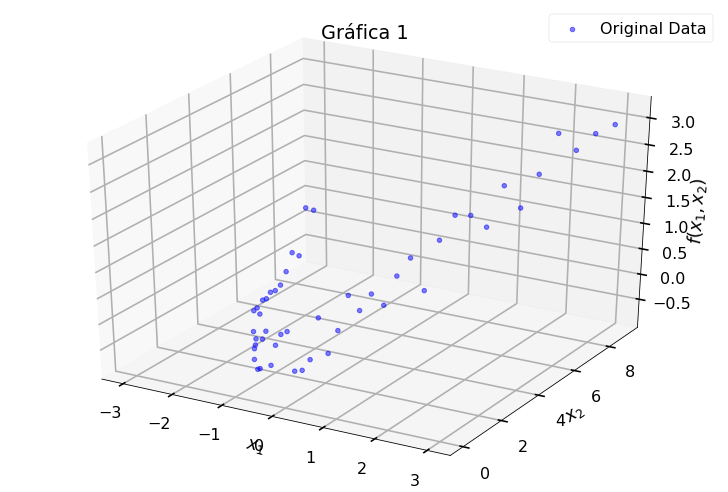

In [4]:
np.random.seed(1)
# Definimos el modelo: f(x1,x2) = theta_1*x1 + theta_2*x2
def model(x, theta):
    return x[0]*theta[0]+x[1]*theta[1]

# Definimos las variables independientes, [x,x**2]
x = np.expand_dims(np.linspace(-3, 3, 50),axis = 1) # Dimension (50,1)
# definimos la variable independiente
y = 0.5*x + 0.2*x**2 + 0.5*(2*np.random.rand(len(x), 1)-1) # Dimension (50,1)
x_vec = np.array([x, x**2]) # Dimension (2,50,1)
# Inicializamos los parametros
theta = np.array([0.00, 0.00]) # Dimension (2)

# Mostramos los datos
fig = plt.figure() # Creamos la figura 
ax = fig.add_subplot(111, projection='3d') # Creamos la figura para 3d
ax.scatter(x, x**2, y, color='blue', alpha=0.5, linewidths=1, label = "Original Data") # Ploteamos los puntos
ax.set(xlabel='$x_1$', ylabel='$x_2$')
ax.set_zlabel('$f(x_1, x_2)$', labelpad=10)
ax.set_title("Gráfica 1")
ax.legend()
plt.show()

**Entrenamos el modelo con solo un caminador: lp.walk**

1.   $x_{vec}$ : matriz de datos de la variable independiente.
2.   $y$ : vector de datos de la variable dependiente
3.   $model$ : Funcion donde se construye el modelo
4.   $theta$ : lista de los parámetros a encontrar
5.   $mode = True$ : Variable booleana que indica que solo se utilizará un caminador

  retorna:

*   $theta$ : lista de los parámetros encontrados
*   $nwalk$ : numero de caminadores
*   $error$ : Error cometido 






In [5]:
# Entrenamos el modelo
theta, nwalk, error = lp.walk(x_vec, y, model, theta, None, 0.01, 200, 0.1, 1.*10**-3, mode = True)

Max. number of iterations have been reached! , The log likelihood is : 1416.4306936087949


In [6]:
print("El valor de theta_1 es: {0}, y el valor de theta_2 es: {1}".format(theta[0],theta[1]))

El valor de theta_1 es: 0.19338214804760065, y el valor de theta_2 es: 0.14923573968389728


* Gráfica del modelo parámétrico entrenado con 1 caminador:
   $f(x_{1},x_{2};0.1033,0.1492) = 0.1033x_{1} + 0.1492x_{2}^2$

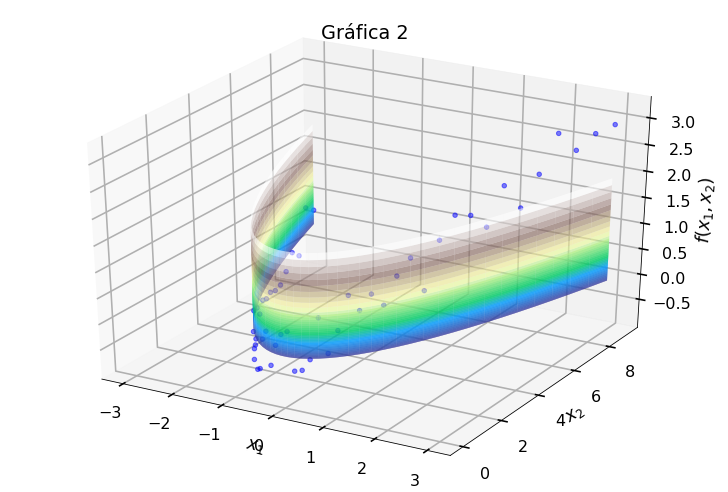

In [7]:
# Gráfico de modelo paramétrico -> f(x_1,x_2) =  0.1033x1+0.1492x2^2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, x**2, model(x_vec, theta).T, alpha=0.6,cmap='terrain', label = "$f(x_{1},x_{2}) = 0.1033x_{1} + 0.1492x_{2}^2$" )
ax.scatter(x, x**2, y, color='blue', alpha=0.5, linewidths=1, label = "Original Data")

ax.set(xlabel='$x_1$', ylabel='$x_2$')
ax.set_zlabel('$f(x_1, x_2)$', labelpad = 15)
ax.set_title("Gráfica 2")
#ax.legend()
plt.show()

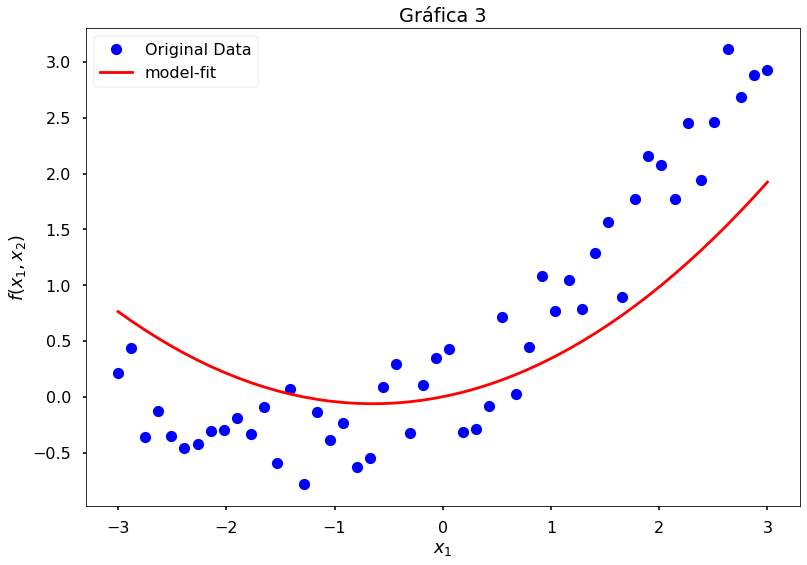

In [8]:
# Gráfica del modelo en la dimensión x1
plt.plot(x, y, 'bo', label = 'Original Data')
plt.plot(x, model(x_vec, theta), 'r-', label = 'model-fit')
plt.xlabel("$x_{1}$")
plt.ylabel("$f(x_1,x_2)$")
plt.title("Gráfica 3")
plt.legend()
plt.show()

**Entrenamos el modelo con 100 caminadores**

1.   $100$ : Número de caminadores.
2.   $x_{vec}$ : matriz de datos de la variable independiente.
3.   $y$ : vector de datos de la variable dependiente
4.   $model$ : Función donde se construye el modelo
5.   $theta$ : lista de los parámetros a encontrar
6.   $mode = True$ : Variable booleana que indica que sólo se utilizará un caminador

  retorna:

*   $par$ : lista de listas que almacena los parámetros encontrados por cada caminador
*   $error$ : Error cometido por los caminadores

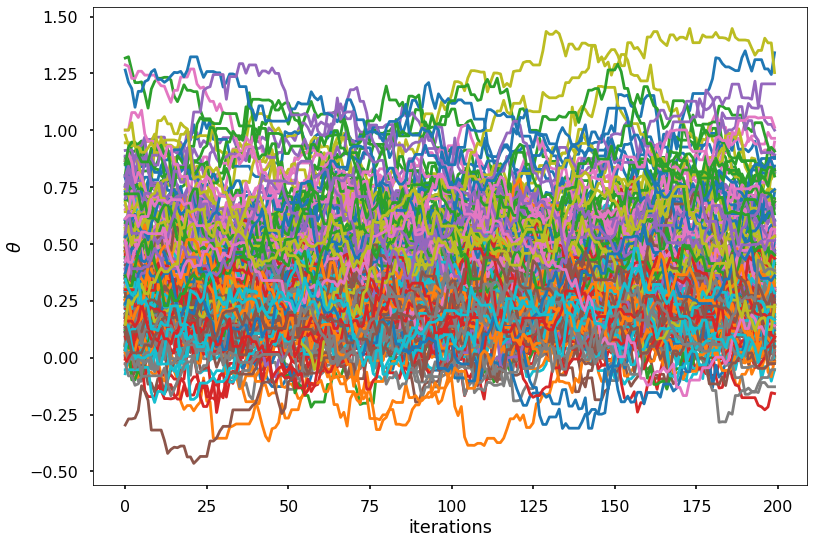

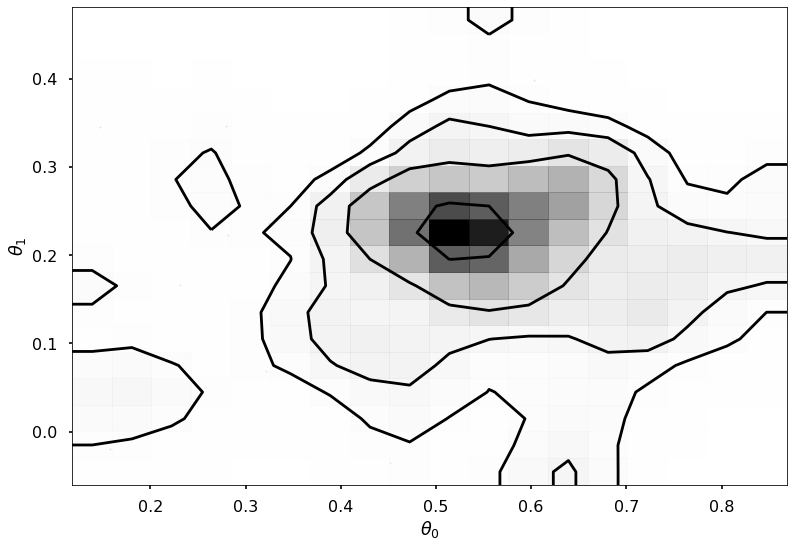

In [9]:
par, error = lp.walkers(100, x_vec, y, model, theta, None, 0.01, 200, 0.1, 1.*10**-3, False)

In [10]:
# Buscamos el mejor caminador, aquel que tenga el menor error
n = np.where(error == min(error))[0][0]

In [11]:
print("El mejor caminador es el numero {}".format(n))

El mejor caminador es el numero 59


In [12]:
# Obtenemos los parámetros del mejor caminador
par = np.array(par[n])

In [13]:
print("El valor de theta_1 es: {0}, y el valor de theta_2 es: {1}".format(par[0],par[1]))

El valor de theta_1 es: 0.5296294154126578, y el valor de theta_2 es: 0.1895406249260183


* Gráfica del modelo parámétrico entrenado con 100 caminadores:
   $f(x_{1},x_{2}) = 0.5296x_{1} + 0.18954x_{2}^2$

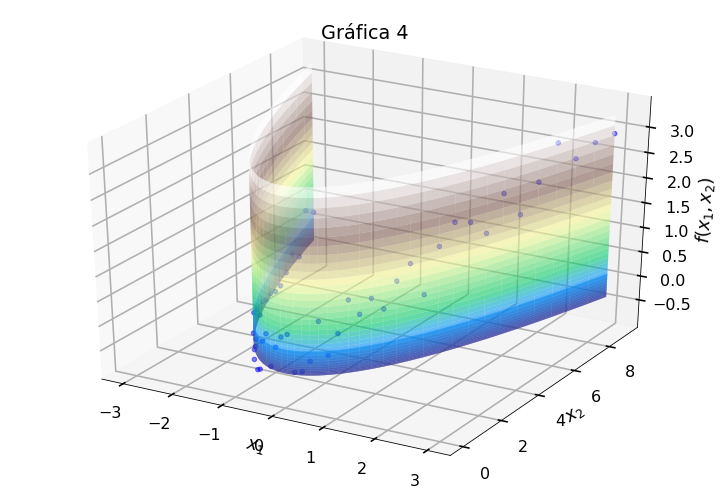

In [14]:
# Grafico de modelo paramétrico -> f(x_1,x_2) = 0.5296x1+0.18954x2^2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, x**2, model(x_vec, par).T, alpha=0.6,cmap='terrain', label = "$f(x_{1},x_{2}) = 0.5296x_{1} + 0.18954x_{2}^2$" )
ax.scatter(x, x**2, y, color='blue', alpha=0.5, linewidths=1, label = "Original Data")

ax.set(xlabel='$x_1$', ylabel='$x_2$')
ax.set_zlabel('$f(x_1, x_2)$', labelpad = 15)
ax.set_title("Gráfica 4")
#ax.legend()
plt.show()

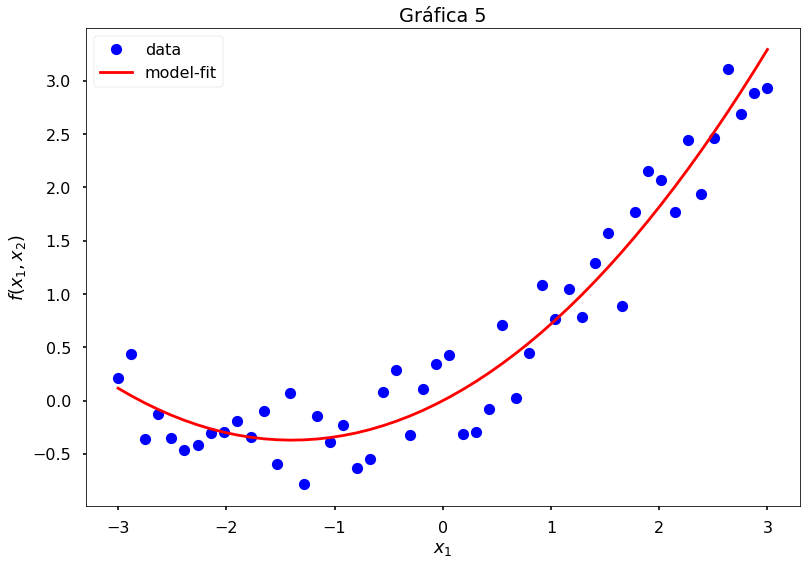

In [15]:
# Grafica de una dimension del modelo de la gráfica 4
plt.plot(x, y, 'bo', label = 'data')
plt.plot(x, model(x_vec, par), 'r-', label = 'model-fit')
plt.xlabel("$x_1$")
plt.ylabel("$f(x_1,x_2)$")
plt.title("Gráfica 5")
plt.legend()
plt.show()

### **Ejemplo 2**

* Tenemos una base de datos del número de multimillonarios por país y por año. 

* Nuetro objetivo es encontrar un modelo y sus parámetros que mejor logre captar la dependencia entre la variable dependiente e independiente

In [16]:
# Importamos la libreria pandas para el manejo de datos
import pandas as pd 

In [17]:
# Decargarmos la base de datos
df = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/mle/fp.dta?raw=true')
# Descragamos el numero de billionarios de estados unidos en 2008
billionaires = df[(df['year'] == 2008) & (
    df['country'] != 'United States')].loc[:, 'numbil0']

# billions -> Cantidad de billones
# numBbillionaires -> numero de personas con x cantidad de billones 
billions, numbillionaires = np.unique(billionaires, return_counts=True)
billions = np.expand_dims(billions, axis = (0,2))
numbillionaires = np.expand_dims(numbillionaires, axis = 1)

In [18]:
# Mostramos la base datos
df

,country,ccode,year,cyear,numbil,numbil0,numbilall,netw,netw0,netwall,gdpcurdol,gdpbill,pop,lnpop,gdppc,lngdp,lngdppc,d7netwall,d7numbilall,lowinc08,midinc08,totppb9008,privprocbarb,fullprivproc,wtoyear,gattwto,gattwto08,mcapbdol,mcapbdol08,lnmcap08,topintaxnew,topint08,rintr,noyrs,roflaw,nrrents
0,United States,2.0,1990.0,21990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.75,NaN,NaN,0.0,3060.000000,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
1,United States,2.0,1991.0,21991.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.75,NaN,NaN,0.0,4090.000000,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
2,United States,2.0,1992.0,21992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.75,NaN,NaN,0.0,4490.000000,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
3,United States,2.0,1993.0,21993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.75,NaN,NaN,0.0,5136.198730,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
4,United States,2.0,1994.0,21994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.75,NaN,NaN,0.0,5067.016113,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,West Bank and Gaza,1005.0,2010.0,10052010.0,NaN,0.0,1011.0,NaN,0.0,3567.800049,8.913100e+09,8.913100,3811102.0,15.153429,2338.719971,22.910788,7.757359,2164.500000,535.0,0.0,1.0,0.0,NaN,0.00,NaN,NaN,0.0,2.450000,2.123060,1.138813,NaN,NaN,5.908871,7.0,-0.81,0.0
5428,West Bank and Gaza,1005.0,2011.0,10052011.0,NaN,0.0,1210.0,NaN,0.0,4496.299805,1.046540e+10,10.465400,3927051.0,15.183399,2664.951416,23.071341,7.887941,2579.099609,623.0,0.0,1.0,0.0,NaN,0.00,NaN,NaN,0.0,2.532470,2.123060,1.138813,NaN,NaN,5.908871,7.0,-0.81,0.0
5429,West Bank and Gaza,1005.0,2012.0,10052012.0,NaN,0.0,1226.0,NaN,0.0,4574.500000,1.127940e+10,11.279400,4046901.0,15.213462,2787.169678,23.146244,7.932782,2338.300049,535.0,0.0,1.0,0.0,NaN,0.00,NaN,NaN,0.0,2.634100,2.123060,1.138813,NaN,NaN,5.908871,7.0,-0.81,0.0
5430,West Bank and Gaza,1005.0,2013.0,10052013.0,NaN,0.0,1427.0,NaN,0.0,5433.010254,1.247600e+10,12.476000,4169506.0,15.243308,2992.200928,23.247072,8.003764,2787.510254,634.0,0.0,1.0,0.0,NaN,0.00,NaN,NaN,0.0,NaN,2.123060,1.138813,NaN,NaN,5.908871,7.0,-0.81,0.0


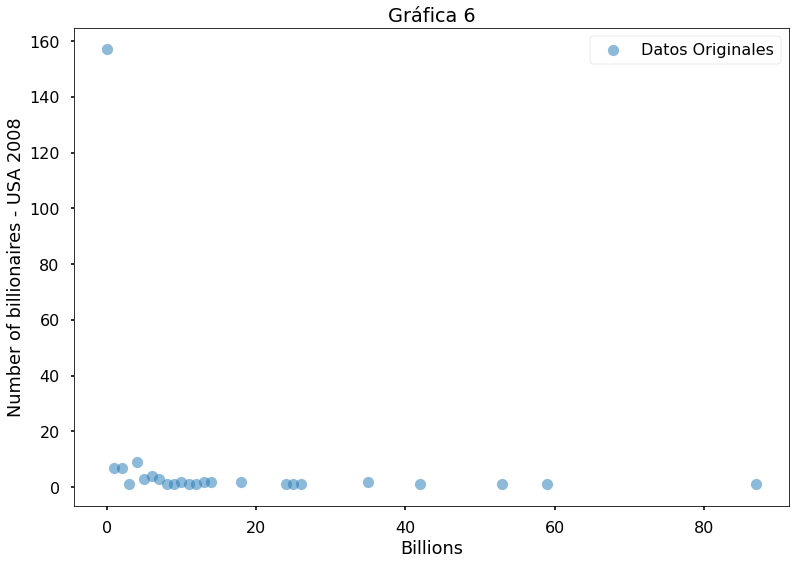

In [19]:
# Mostramos la dispersión de los datos
plt.scatter(billions, numbillionaires, label = 'Datos Originales', alpha=0.5, linewidths=0.001)
plt.xlabel("Billions")
plt.ylabel("Number of billionaires - USA 2008")
plt.title("Gráfica 6")
plt.legend()
plt.show()

* Análisis de la familia de funciones :  $f(x;\theta_{1},\theta_{2}) = \theta_{1} e^{-\theta_{2} x}$ - Gráfica 7

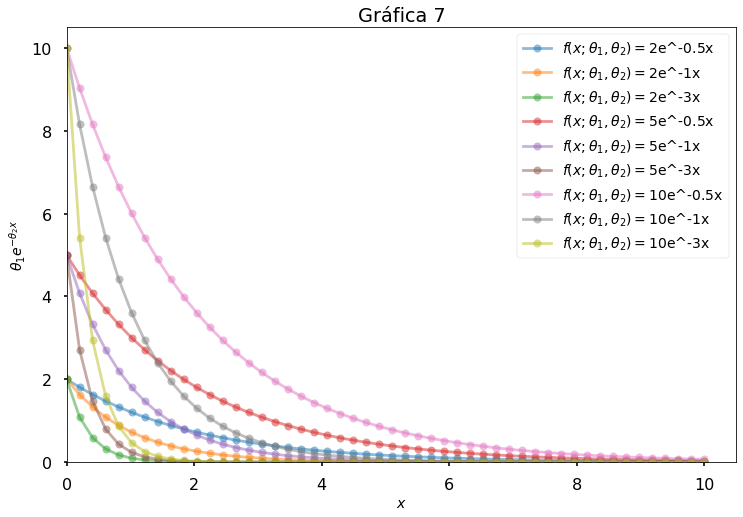

In [20]:
# Definimos el modelo paramétrico
def f_exp(x, theta_1, theta_2):
  return theta_1*np.exp(-theta_2*x) 
  
# Creamos la figura
fig, ax = plt.subplots(figsize=(12, 8))

# Creamos el dominio
x = np.linspace(0,10,50)
# Creamos los valores de theta_1
theta_1 = [2,5,10]
theta_2 = [0.5,1,3]

for param_1 in theta_1:
  for param_2 in theta_2:
    ax.plot(x, f_exp(x,param_1,param_2),
            label="$f(x;\\theta_{1},\\theta_{2}) = $"  + "{0}e^-{1}x".format(param_1,param_2),
            alpha=0.5,
            marker='o',
            markersize=8)

ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$\\theta_{1} e^{-\\theta_2 x}$', fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)
plt.title("Gráfica 7")
plt.show()

* Con base en los datos de la gráfica 6 y el análisis de la gráfica 7
* Proponemos el siguiente modelo : $f(x;\theta) = 157e^{-\theta x}$

In [21]:
# Definimos el modelo: f(x) = init*e^(-theta_1*x)
def model_Billioners(x, theta):
    init = numbillionaires[0][0]  
    return init*np.exp(-theta[0]*x[0])

# Inicializacion de el parámetro theta_1
theta = np.array([0.0])

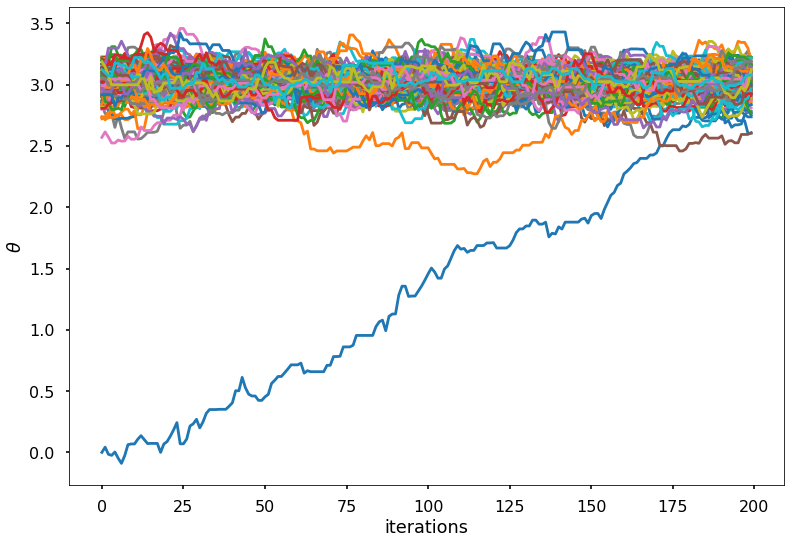

In [22]:
# Entrenamiento del modelo con 200 caminadores
thetas, error = lp.walkers(200, billions,numbillionaires, model_Billioners, theta, None, 0.01, 200, 0.1, 1.*10**-3, False)
n = np.where(error == min(error))[0][0]

theta = np.array(thetas[n])

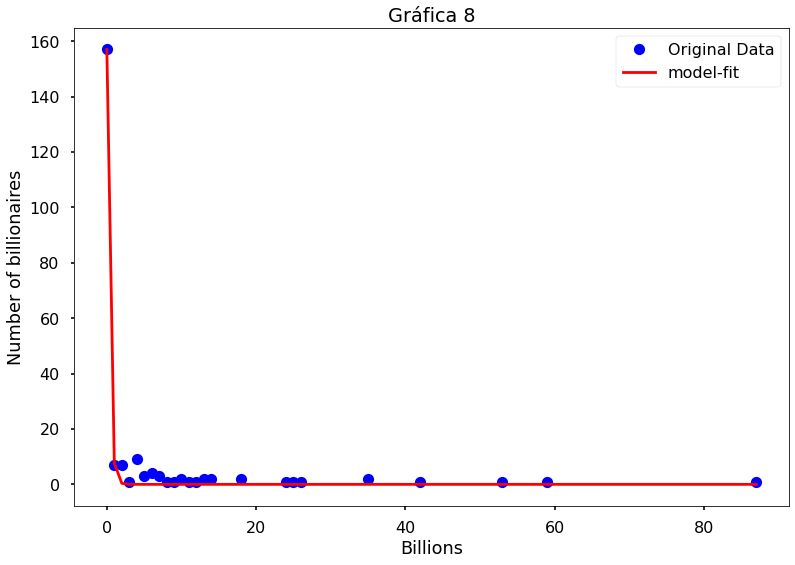

In [23]:
# Gráfica del modelo entrenado y un scatter de los puntos
plt.plot(billions[0], numbillionaires, 'bo', label = 'Original Data')
plt.plot(billions[0], model_Billioners(billions, theta), 'r-', label = 'model-fit')
plt.xlabel("Billions")
plt.ylabel("Number of billionaires")
plt.title("Gráfica 8")
plt.legend()
plt.show()

In [24]:
print("El valor de theta es: {0}".format(theta[0]))

El valor de theta es: 3.020623669854669


* Gráfica del modelo parámétrico entrenado con 200 caminadores:
   $f(x;3.0202) = 157e^{-3.0202 x}$

* Consideremos ahora que el modelo tiene dos parámetros. Entonces desamos encontrar: $f(x;\theta_{1},\theta_{2}) = \theta_{1} e^{-\theta_{2} x}$

In [25]:
# Definición del modelo f(x,theta_1,theta_2)
def model_Billioners2(x, theta):
    return theta[0]*np.exp(-theta[1]*x[0])

# Inicialización de el parámetro theta_1, theta_2
theta = np.array([0.0,0.0])

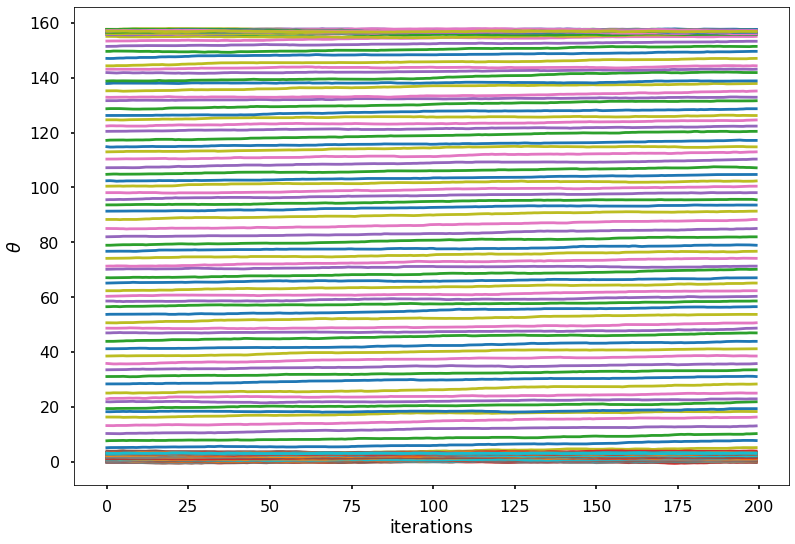

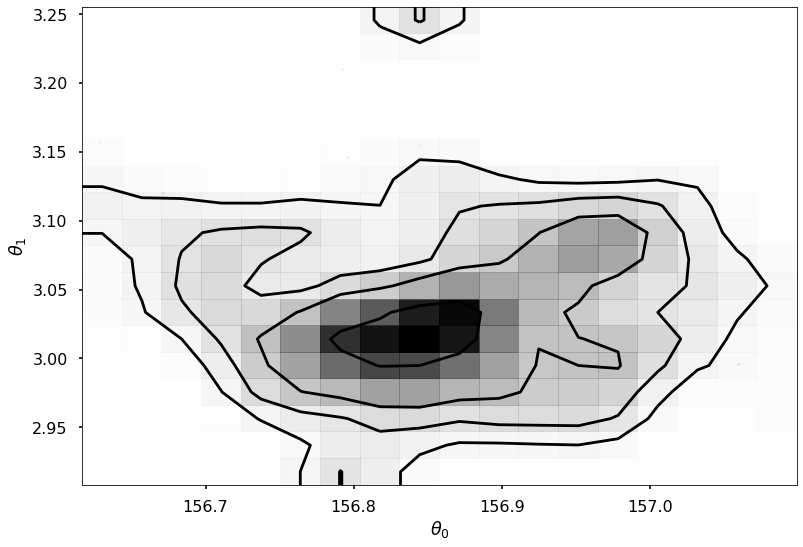

In [26]:
# Entrenamiento del modelo con 200 caminadores
thetas, error = lp.walkers(200, billions,numbillionaires, model_Billioners2, theta, None, 0.01, 200, 0.1, 1.*10**-3, False)
n = np.where(error == min(error))[0][0]

theta = np.array(thetas[n])

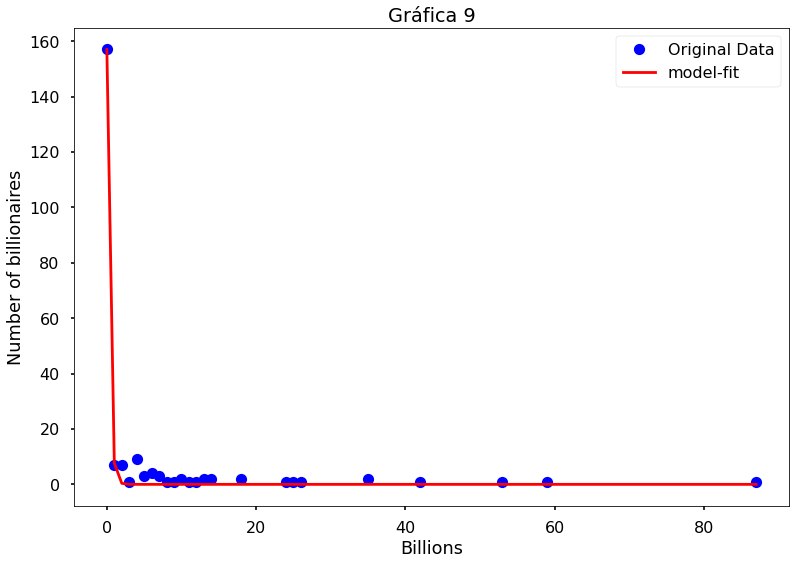

In [27]:
# Gráfica del modelo entrenado y un scatter de los puntos
plt.plot(billions[0], numbillionaires, 'bo', label = 'Original Data')
plt.plot(billions[0],  model_Billioners2(billions, theta), 'r-', label = 'model-fit')
plt.xlabel("Billions")
plt.ylabel("Number of billionaires")
plt.title("Gráfica 9")
plt.legend()
plt.show()

In [28]:
print("El valor de theta_1 es: {0}, y el valor de theta_2 es: {1}".format(theta[0],theta[1]))

El valor de theta_1 es: 157.00752364379645, y el valor de theta_2 es: 3.029091689273707


* Gráfica del modelo parámétrico entrenado con 200 caminadores:
   $f(x;156.95,3.024) = 156.95e^{-3.024 x}$

* Consideremos ahora que el modelo tiene tres parámetros. Entonces desamos encontrar: $f(x;\theta_{1},\theta_{2}, \theta_{3}) = \theta_{1} e^{-\theta_{2} x} + \theta_{3}$

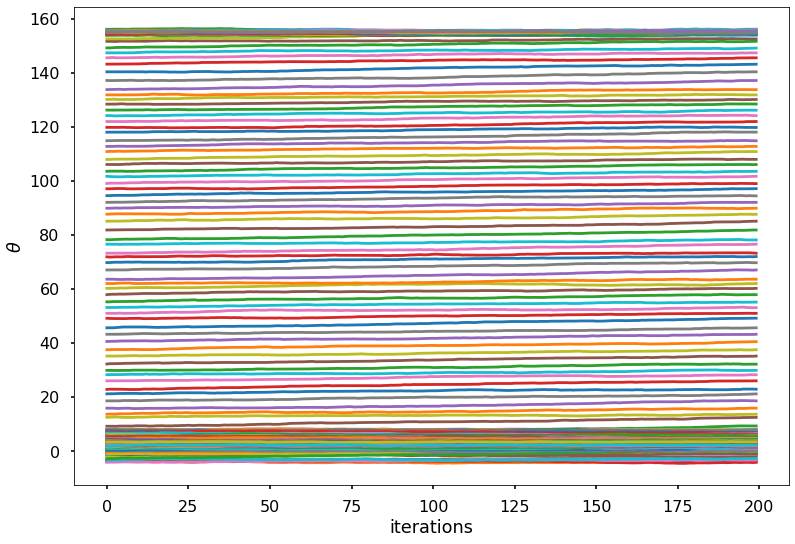

In [29]:
# Definición del modelo f(x,theta_1,theta_2)
def model_Billioners3(x, theta):
    return theta[0]*np.exp(-theta[1]*x[0]) + theta[2]

# Inicialización de el parámetro theta_1, theta_2
theta = np.array([0.0,0.0,0.0])

# Entrenamiento del modelo con 200 caminadores
thetas, error = lp.walkers(200, billions,numbillionaires, model_Billioners3, theta, None, 0.01, 200, 0.1, 1.*10**-3, False)
n = np.where(error == min(error))[0][0]

theta = np.array(thetas[n])

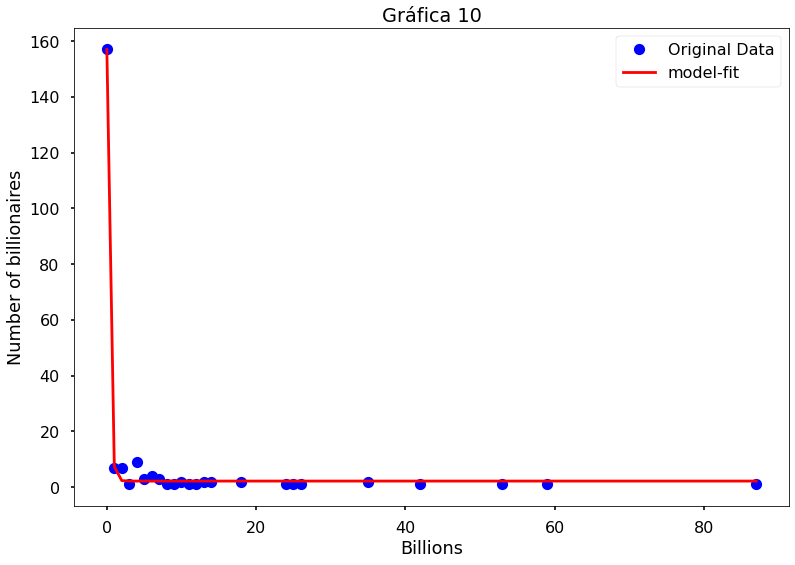

In [30]:
# Gráfica del modelo entrenado y un scatter de los puntos
plt.plot(billions[0], numbillionaires, 'bo', label = 'Original Data')
plt.plot(billions[0],  model_Billioners3(billions, theta), 'r-', label = 'model-fit')
plt.xlabel("Billions")
plt.ylabel("Number of billionaires")
plt.title("Gráfica 10")
plt.legend()
plt.show()

In [31]:
print("El valor de theta_1 es: {0}, el valor de theta_2 es: {1}, y el valor de theta_3 es {2}".format(theta[0],theta[1],theta[2]))

El valor de theta_1 es: 154.82377031922394, el valor de theta_2 es: 3.4024968908275977, y el valor de theta_3 es 2.176092800268858


* Gráfica del modelo paramétrico entrenado con 200 caminadores:
   $f(x;156.859,3.410,2.154) = 156.999e^{-3.0202 x} + 2.154$


* Problema de práctica

In [32]:
# Descargamos el dataFrame
dataFrame = pd.read_csv("Datos históricos USD_ARS.csv")
# cierre -> Variable dependiente
cierre = dataFrame.iloc[:,1][::-1]
# dias variable dependiente
dias = np.arange(1,len(cierre) + 1)

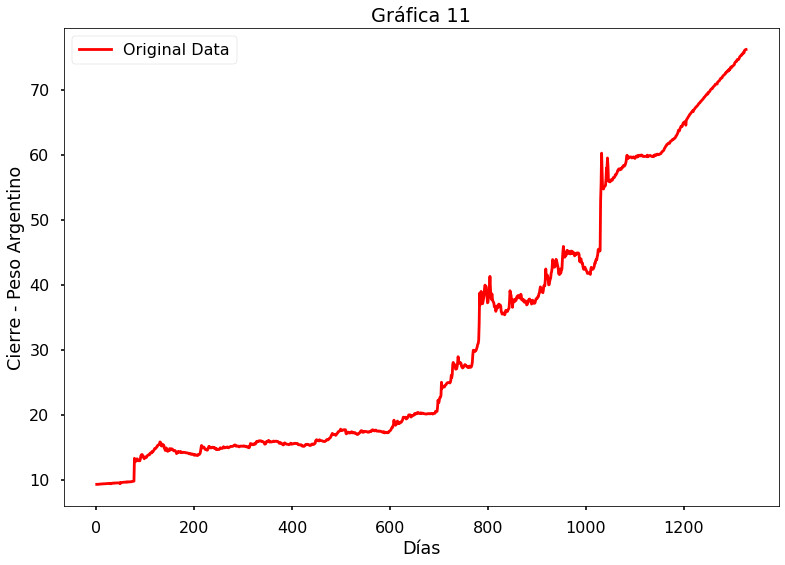

In [33]:
# Gráfica del modelo entrenado y un scatter de los puntos
plt.plot(dias, cierre, 'r-', label = 'Original Data')
plt.xlabel("Días")
plt.ylabel("Cierre - Peso Argentino")
plt.title("Gráfica 11")
plt.legend()
plt.show()